In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from torch.utils import data
from eegnet_repl.dataset import build_dataset_from_preprocessed

2026-01-19 15:48:47,368 - _api.py - acquire - DEBUG - Attempting to acquire lock 2741872509344 on C:\Users\Prashastha\.mne\mne-python.json.lock
2026-01-19 15:48:47,370 - _api.py - acquire - DEBUG - Lock 2741872509344 acquired on C:\Users\Prashastha\.mne\mne-python.json.lock
2026-01-19 15:48:47,371 - _api.py - acquire - DEBUG - Lock 2741872509344 acquired on C:\Users\Prashastha\.mne\mne-python.json.lock
2026-01-19 15:48:47,372 - _api.py - release - DEBUG - Attempting to release lock 2741872509344 on C:\Users\Prashastha\.mne\mne-python.json.lock
2026-01-19 15:48:47,373 - _api.py - release - DEBUG - Lock 2741872509344 released on C:\Users\Prashastha\.mne\mne-python.json.lock
2026-01-19 15:48:49,782 - __init__.py - <module> - DEBUG - Creating converter from 7 to 5
2026-01-19 15:48:49,783 - __init__.py - <module> - DEBUG - Creating converter from 5 to 7
2026-01-19 15:48:49,784 - __init__.py - <module> - DEBUG - Creating converter from 7 to 5
2026-01-19 15:48:49,784 - __init__.py - <module> 

# Load processed data

In [2]:
dataset = build_dataset_from_preprocessed(src='kaggle', subject=9)

2026-01-19 15:48:50,758 - dataset.py - build_dataset_from_preprocessed - INFO - Building dataset from preprocessed data in C:\Users\Prashastha\Desktop\EEGNetReplication\data\processed
2026-01-19 15:48:50,759 - dataset.py - build_dataset_from_preprocessed - INFO - Found 1 preprocessed files for subject 9


Opening raw data file C:\Users\Prashastha\Desktop\EEGNetReplication\data\processed\A09T-preprocessed.fif...
    Range : 0 ... 344743 =      0.000 ...  2693.305 secs
Ready.
Reading 0 ... 344743  =      0.000 ...  2693.305 secs...


C:\Users\Prashastha\Desktop\EEGNetReplication\src\eegnet_repl\dataset.py:163: RuntimeWarning: This filename (C:\Users\Prashastha\Desktop\EEGNetReplication\data\processed\A09T-preprocessed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  pp = mne.io.read_raw_fif(file, preload=True)


Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 257 original time points ...
0 bad epochs dropped


In [3]:
dataset.X.shape

(288, 22, 257)

In [4]:
# Split the dataset into training and validation sets with seed for reproducibility
generator = torch.Generator().manual_seed(42)
train_data, val_data = data.random_split(dataset=dataset,lengths=[0.9,0.1], generator=generator)

In [5]:
# 2.1. create data loader for the trainset (batch_size=64, shuffle=True)
train_loader = data.DataLoader(train_data, batch_size=64, shuffle=True)

# 2.2. create data loader for the valset (batch_size=64, shuffle=False)
val_loader = data.DataLoader(val_data, batch_size=64, shuffle=False)

In [6]:
dataiter = iter(train_loader)
batch_eeg, batch_labels = next(dataiter)

In [7]:
batch_eeg.shape

torch.Size([64, 22, 257])

In [8]:
batch_eeg[0,0,0]

tensor(-0.0006, dtype=torch.float64)

In [9]:
test = batch_eeg.float()
test[0,0,0].dtype

torch.float32

In [10]:
batch_labels

tensor([10,  8,  8, 10, 10,  7,  9, 10,  9, 10,  7,  7, 10, 10, 10,  9,  8,  9,
        10,  8,  7, 10,  9,  9,  9,  8,  8,  7,  9,  8, 10,  9, 10,  7,  8,  7,
        10,  9,  8,  8,  9, 10,  8, 10, 10,  7, 10,  8,  8,  7,  7,  9,  8,  7,
        10,  8, 10,  7,  8,  9,  7,  8,  7,  8])

2026-01-19 15:48:51,284 - pyplot.py - switch_backend - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2026-01-19 15:48:51,286 - pyplot.py - switch_backend - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2026-01-19 15:48:51,291 - font_manager.py - _findfont_cached - DEBUG - findfont: Matching serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2026-01-19 15:48:51,293 - font_manager.py - _findfont_cached - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\Prashastha\\Desktop\\EEGNetReplication\\.eegnetenv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2026-01-19 15:48:51,294 - font_manager.py - _findfont_cached - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\Prashastha\\Desktop\\EEGNetReplication\\.eegnetenv\\Lib\\site-packages\\matp

2026-01-19 15:48:51,740 - font_manager.py - _findfont_cached - DEBUG - findfont: Matching serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
2026-01-19 15:48:51,741 - font_manager.py - _findfont_cached - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\Prashastha\\Desktop\\EEGNetReplication\\.eegnetenv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2026-01-19 15:48:51,741 - font_manager.py - _findfont_cached - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\Prashastha\\Desktop\\EEGNetReplication\\.eegnetenv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2026-01-19 15:48:51,744 - font_manager.py - _findfont_cached - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\Pr

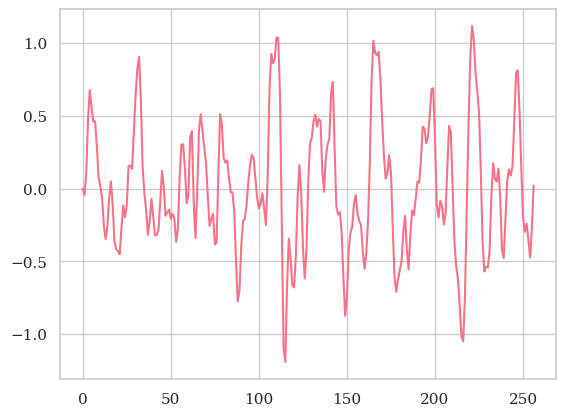

In [11]:
plt.plot(batch_eeg[0,0,:])

In [12]:
df = pd.DataFrame(batch_eeg[0].T)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       257 non-null    float64
 1   1       257 non-null    float64
 2   2       257 non-null    float64
 3   3       257 non-null    float64
 4   4       257 non-null    float64
 5   5       257 non-null    float64
 6   6       257 non-null    float64
 7   7       257 non-null    float64
 8   8       257 non-null    float64
 9   9       257 non-null    float64
 10  10      257 non-null    float64
 11  11      257 non-null    float64
 12  12      257 non-null    float64
 13  13      257 non-null    float64
 14  14      257 non-null    float64
 15  15      257 non-null    float64
 16  16      257 non-null    float64
 17  17      257 non-null    float64
 18  18      257 non-null    float64
 19  19      257 non-null    float64
 20  20      257 non-null    float64
 21  21      257 non-null    float64
dtypes:

2026-01-19 15:48:52,297 - category.py - update - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-19 15:48:52,306 - category.py - update - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


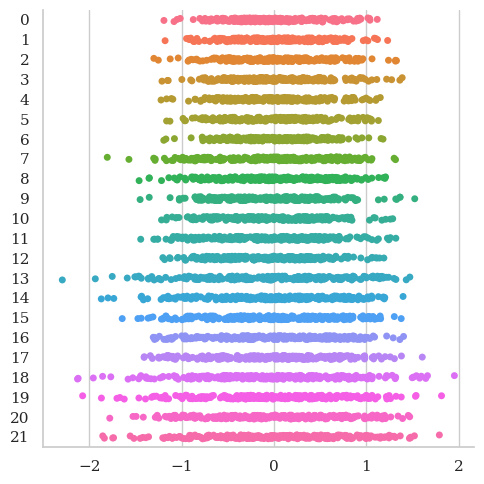

In [13]:
sns.catplot(data=df,kind='strip', orient='y')

# Architecture

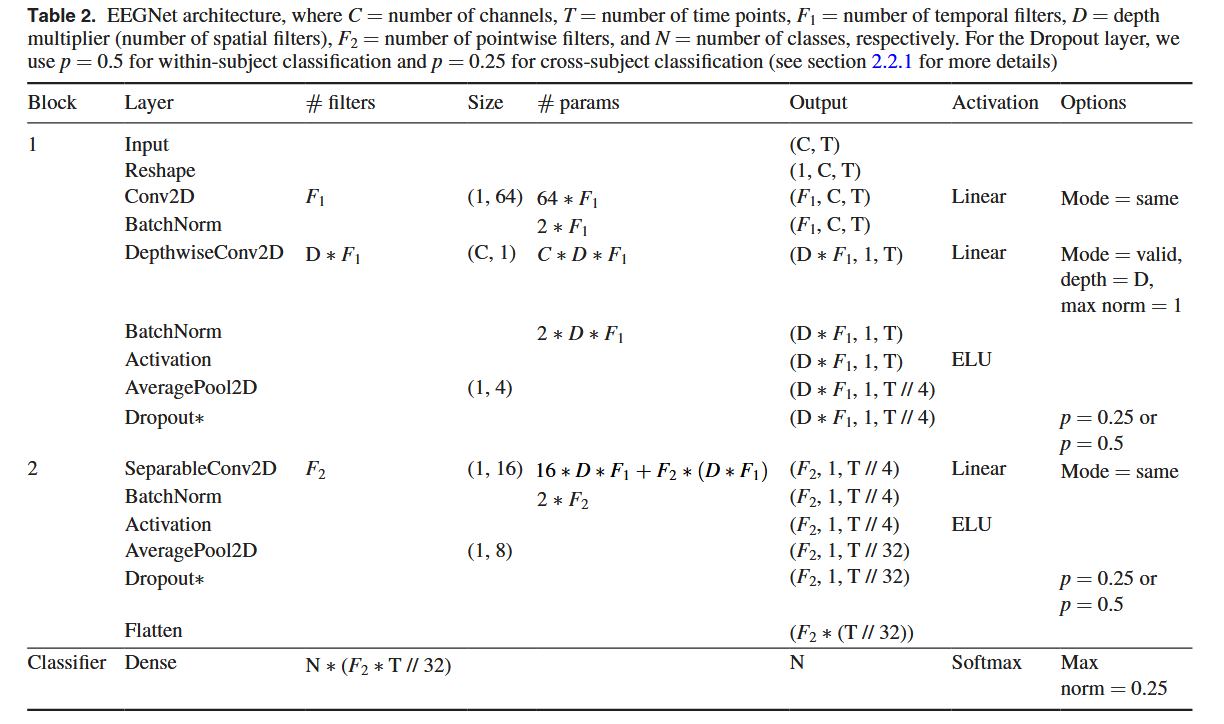

**EEGNet-8,2 parameters:**

F1 = 8 -> temporal filters

D = 2 -> spatial filters

F2 = F1*D -> pointwise convolutions, can be any number but authors choose this

In [14]:
# Define model
class reEEGNet(nn.Module):
    def __init__(self, C, T, F1=8, D=2, p=0.5):
        # C = number of channels, input.shape[1], C = 22 based on 02_preprocessing_pipeline
        # T = number of timepoints per batch, input.shape[2], T = 257 based on 02_preprocessing_pipeline
        # F1 = temporal filters
        # D = spatial filters
        # p = dropout probability: 0.5 for within-subject classification, 0.25 for cross-subject classification

        super().__init__()
        F2 = F1*D # pointwise convolutions, can be any number but authors choose this
        self.temporal = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=F1,
                kernel_size=(1,32),
                padding='same', # keeps initial dims per channel
                groups=1, # default
                bias=False # "We omit the use of bias units in all convolutional layers."
            ),
            # Linear activation = do nothing?
            nn.BatchNorm2d(num_features=F1)) # "We apply batch normalization along the feature map dimension"
        
        self.spatial = nn.Conv2d(
            in_channels=F1,
            out_channels=D*F1,
            kernel_size=(C,1), 
            padding='valid', # no padding -> collapses channel dimension
            groups=F1, # produces depthwise convolution
            bias=False # "We omit the use of bias units in all convolutional layers."
            )
        # "We also regularize each spatial filter by using a maximum norm constraint of 1 on its weights"
        max_norm_value = 1.0 
        self.spatial.weight.register_hook(lambda x: torch.clamp(x, min=-max_norm_value, max=max_norm_value))

        self.aggregation = nn.Sequential(
            nn.BatchNorm2d(num_features=D*F1), # "We apply batch normalization along the feature map dimension"
            nn.ELU(),
            nn.AvgPool2d(kernel_size=(1,4)), # default stride = kernel_size 
            nn.Dropout(p=p)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d( # depthwise part of separable convolution
            in_channels=D*F1,
            out_channels=D*F1,
            kernel_size=(1,16), 
            padding='same', # keeps initial dims per channel
            groups=D*F1, # produces depthwise convolution
            bias=False # "We omit the use of bias units in all convolutional layers."
            ),
            nn.Conv2d( # pointwise part of separable convolution
            in_channels=D*F1,
            out_channels=F2,
            kernel_size=(1,1), 
            padding='same', # keeps initial dims per channel, shouldn't matter in this case
            groups=1, # default
            bias=False # "We omit the use of bias units in all convolutional layers."
            ),
            # Linear activation = do nothing?
            nn.BatchNorm2d(num_features=F2), # "We apply batch normalization along the feature map dimension"
            nn.ELU(),
            nn.AvgPool2d(kernel_size=(1,8)), # default stride = kernel_size
            nn.Dropout(p=p),
            nn.Flatten()
        )

        self.classifier = nn.Linear(
                in_features=F2*(T//32),
                out_features=4, # number of classes
                bias=True # since it's not a convolutional layer..?
            )
        max_norm_value_1 = 0.25 
        self.classifier.weight.register_hook(lambda x: torch.clamp(x, min=-max_norm_value_1, max=max_norm_value_1))
        
        # nn.Softmax(dim=1) # dim = 0 is for batch number; comented out because of nn.CrossEntropyLoss() documentation:
        # "The input is expected to contain the unnormalized logits for each class (which do not need to be positive or sum to 1, in general)."



    def forward(self, x):
        x = torch.unsqueeze(x,dim=1) # inserts new dim at specified position, shape = (n_batches, C, T) -> shape = (n_batches, 1, C, T)
        filter_bank = self.temporal(x)
        spatial_pattern = self.spatial(filter_bank)
        block_1_out = self.aggregation(spatial_pattern)
        block_2_out = self.block_2(block_1_out)
        output = self.classifier(block_2_out)
        
        return output

In [15]:
model = reEEGNet(C=dataset.X.shape[1], T=dataset.X.shape[2])

In [16]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor])

Model's state_dict:
temporal.0.weight 	 tensor([[[[-0.1450,  0.0772, -0.0112,  0.1198,  0.0138, -0.0767,  0.0574,
            0.1676,  0.1129, -0.0600,  0.0477,  0.0796,  0.0715,  0.1562,
           -0.0122, -0.1499, -0.0515,  0.1739, -0.1033,  0.0135,  0.0767,
           -0.0479, -0.0402, -0.0329,  0.1372,  0.1367,  0.1561,  0.1705,
            0.1110, -0.0108,  0.1393,  0.1345]]],


        [[[-0.0748, -0.0979,  0.1154, -0.1759,  0.1136, -0.1604,  0.1308,
           -0.0378, -0.0863,  0.1598, -0.1215,  0.0125, -0.1757, -0.0935,
            0.0593,  0.1146, -0.0567,  0.0198, -0.1092, -0.0803,  0.0823,
           -0.0697, -0.0356,  0.0869, -0.1491,  0.1322, -0.0560, -0.0331,
            0.0912, -0.1722,  0.1345,  0.0952]]],


        [[[ 0.1230, -0.0561,  0.0627,  0.1209,  0.1063, -0.0177, -0.1135,
           -0.1420, -0.1141,  0.1722,  0.0808, -0.1220, -0.1368,  0.1595,
            0.0298, -0.0897,  0.0473, -0.1584, -0.1296, -0.0339,  0.0776,
           -0.1361, -0.0286,  0.1134, -0.1

In [17]:
print(model.parameters())

<generator object Module.parameters at 0x0000027E6EE00F20>


# Training

"We run 500 training iterations (epochs) and perform validation stopping, saving the model weights which produced the lowest validation set loss."

In [18]:
loss_fn = nn.CrossEntropyLoss() # "minimizing the categorical cross-entropy loss function"

# "We fit the model using the Adam optimizer, using default parameters as described in [75]"
# they used tensorflow, for parameters shared with pytorch only eps is slightly different
optimizer = torch.optim.Adam(
    params = model.parameters(),
    eps=1e-07, # the only change from default eps=1e-8, shouldn't matter I think
    foreach=None, # default, "If memory is prohibitive, batch fewer parameters through the optimizer at a time or switch this flag to False"
    fused=None, # default, "To force running the for-loop implementation, pass False for either foreach or fused."
    )

In [19]:
def train(model, optimizer, loss_fn, train_loader, val_loader, nepochs=500):
    '''
    Train a pytorch model and evaluate it every epoch.
    Params:
    model - a pytorch model to train
    optimizer - an optimizer
    loss_fn - the criterion (loss function)
    nepochs - number of training epochs
    train_loader - dataloader for the trainset
    val_loader - dataloader for the valset

    Returns: 
    1. state_dict of the model with the lowest validation loss, 
    2. list of train losses,
    3. list of validation losses.
    '''
    
    train_losses, val_losses = [], []
    best_model = model.state_dict()

    for e in range(nepochs):
        running_loss = 0
        running_val_loss = 0
        for signals, labels in train_loader: # signals = (batch, C, T), labels = (batch, label)

            # Map the old values (7, 8, 9, 10) to new values (0, 1, 2, 3) -> need to change data processing later
            new_labels = torch.zeros_like(labels)
            new_labels[labels == 7] = 0
            new_labels[labels == 8] = 1
            new_labels[labels == 9] = 2
            new_labels[labels == 10] = 3
            
            signals = signals.float() # added to avoid dtype mismatch error
            # Training pass
            model.train() # set model in train mode
            preds = model(signals)
            loss = loss_fn(preds,new_labels)

            running_loss += loss.item()

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

    #else:
        val_loss = 0
        # Evalaute model on validation at the end of each epoch.
        with torch.no_grad():
            for signals, labels in val_loader: # signals = (batch, C, T), labels = (batch, label)

                # Map the old values (7, 8, 9, 10) to new values (0, 1, 2, 3) -> need to change data processing later
                new_labels = torch.zeros_like(labels)
                new_labels[labels == 7] = 0
                new_labels[labels == 8] = 1
                new_labels[labels == 9] = 2
                new_labels[labels == 10] = 3

                signals = signals.float() # added to avoid dtype mismatch error
                preds = model(signals)
                val_loss = loss_fn(preds,new_labels)

                running_val_loss += val_loss.item()

        # track train loss and validation loss
        train_losses.append(running_loss/len(train_loader))
        val_losses.append(running_val_loss/len(val_loader))

        if running_val_loss == np.min(np.array(val_losses)):
            best_model = model.state_dict()

        if e%50==0:
            print("Epoch: {}/{}.. ".format(e+1, nepochs),
            "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
            "Validation Loss: {:.3f}.. ".format(running_val_loss/len(val_loader)))

    return best_model, train_losses, val_losses

In [20]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")
best_model, train_losses, val_losses = train(model, optimizer, loss_fn, train_loader, val_loader, nepochs=500)

Using cuda device


c:\Users\Prashastha\Desktop\EEGNetReplication\.eegnetenv\Lib\site-packages\torch\nn\modules\conv.py:543: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Convolution.cpp:1032.)
  return F.conv2d(


Epoch: 1/500..  Training Loss: 1.354..  Validation Loss: 1.342.. 
Epoch: 51/500..  Training Loss: 0.979..  Validation Loss: 0.879.. 
Epoch: 101/500..  Training Loss: 0.702..  Validation Loss: 0.697.. 
Epoch: 151/500..  Training Loss: 0.595..  Validation Loss: 0.896.. 
Epoch: 201/500..  Training Loss: 0.464..  Validation Loss: 0.582.. 
Epoch: 251/500..  Training Loss: 0.425..  Validation Loss: 0.663.. 
Epoch: 301/500..  Training Loss: 0.479..  Validation Loss: 0.552.. 
Epoch: 351/500..  Training Loss: 0.357..  Validation Loss: 0.863.. 
Epoch: 401/500..  Training Loss: 0.430..  Validation Loss: 0.697.. 
Epoch: 451/500..  Training Loss: 0.318..  Validation Loss: 0.523.. 


In [21]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in best_model:
    print(param_tensor, "\t", best_model[param_tensor])

Model's state_dict:
temporal.0.weight 	 tensor([[[[ 0.0430,  0.2296, -0.0031,  0.0773,  0.0072, -0.0387,  0.1036,
            0.1573,  0.0199, -0.1938, -0.0528,  0.0363,  0.0976,  0.2567,
            0.1352, -0.0467, -0.0103,  0.2343,  0.0236,  0.1441,  0.1375,
           -0.0985, -0.1365, -0.0806,  0.1261,  0.1040,  0.0775,  0.0884,
            0.0815,  0.0104,  0.1686,  0.1099]]],


        [[[-0.1253, -0.1327,  0.1709, -0.0741,  0.1719, -0.2245,  0.0102,
           -0.1028, -0.0678,  0.2221, -0.0948, -0.0180, -0.1973, -0.0685,
            0.0868,  0.0949, -0.1260, -0.0304, -0.0835, -0.0041,  0.1538,
           -0.0513, -0.1154, -0.0416, -0.1843,  0.1945,  0.0250, -0.0029,
            0.0512, -0.2394,  0.0786,  0.0527]]],


        [[[ 0.3177,  0.0219,  0.0414,  0.0455,  0.0357, -0.0426, -0.1143,
           -0.1672, -0.1449,  0.1590,  0.0432, -0.1768, -0.1532,  0.1827,
            0.0469, -0.0609,  0.1164, -0.0595, -0.0274,  0.0529,  0.1026,
           -0.2108, -0.1318,  0.0635, -0.1

Text(0, 0.5, 'Loss')

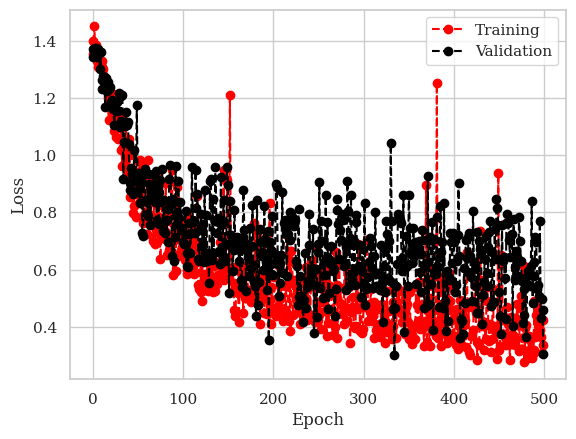

In [22]:
plt.plot(np.arange(len(train_losses)),train_losses,'ro--')
plt.plot(np.arange(len(val_losses)),val_losses,'ko--')
plt.legend(labels=['Training','Validation'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [23]:
#torch.save(best_model, PATH)

## Trying to visualize one of the filters, ignore for now

In [24]:
temporal_filters = best_model['temporal.0.weight']

In [25]:
temp_f_1 = temporal_filters[0,0,0]

In [26]:
temp_f_1.shape[0]

32

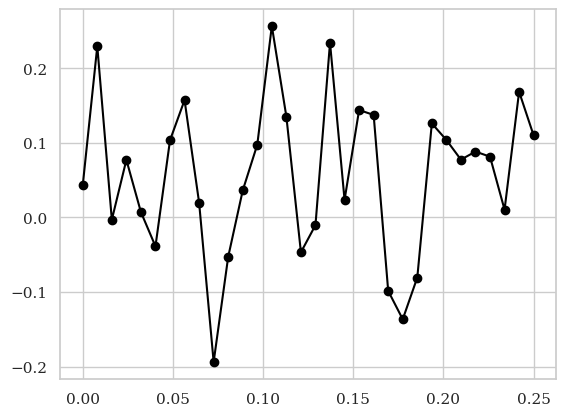

In [27]:
t = np.linspace(0,0.25,temp_f_1.shape[0]) # filter should cover ~250 ms of input (if input is 257 points and filter is 32 points long)
plt.plot(t, temp_f_1, 'ko-')

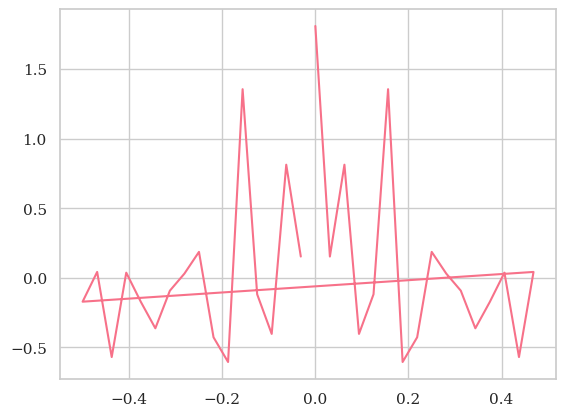

In [28]:
sp = np.fft.fft(temp_f_1)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real)
#plt.plot(freq, sp.imag)

In [29]:
def PS(time_signal, f_sampling, method='ps'):
    fft = np.fft.fft(time_signal)
    mag_squared = np.real(fft * np.conjugate(fft))
    f = np.fft.fftfreq(len(time_signal), 1/f_sampling)

    if method == 'psd':
        scaling_factor = 2 / (f_sampling * len(time_signal))
    else:
        scaling_factor = 2 / (len(time_signal)**2) 

    PS = scaling_factor * mag_squared
    return f, PS

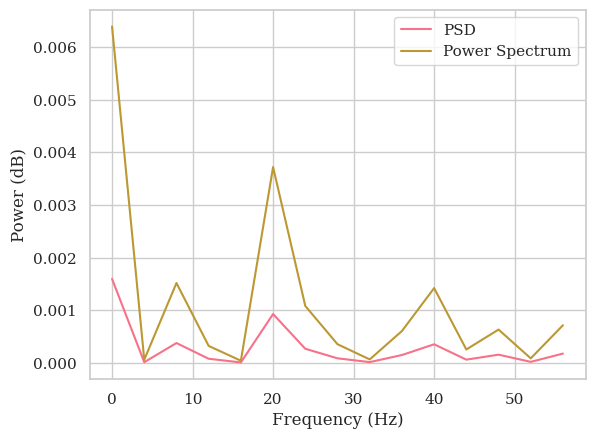

In [30]:
f, ps_version1 = PS(time_signal=temp_f_1, f_sampling=128, method='psd') # Power Spectral Density scaling
f, ps_version2 = PS(time_signal=temp_f_1, f_sampling=128, method='ps')  # Power Spectrum scaling

plt.plot(f[0:len(f)//2-1], ps_version1[0:len(f)//2-1])
plt.plot(f[0:len(f)//2-1], ps_version2[0:len(f)//2-1])
plt.legend(['PSD', 'Power Spectrum'])
plt.ylabel('Power (dB)')
plt.xlabel('Frequency (Hz)')
plt.show()

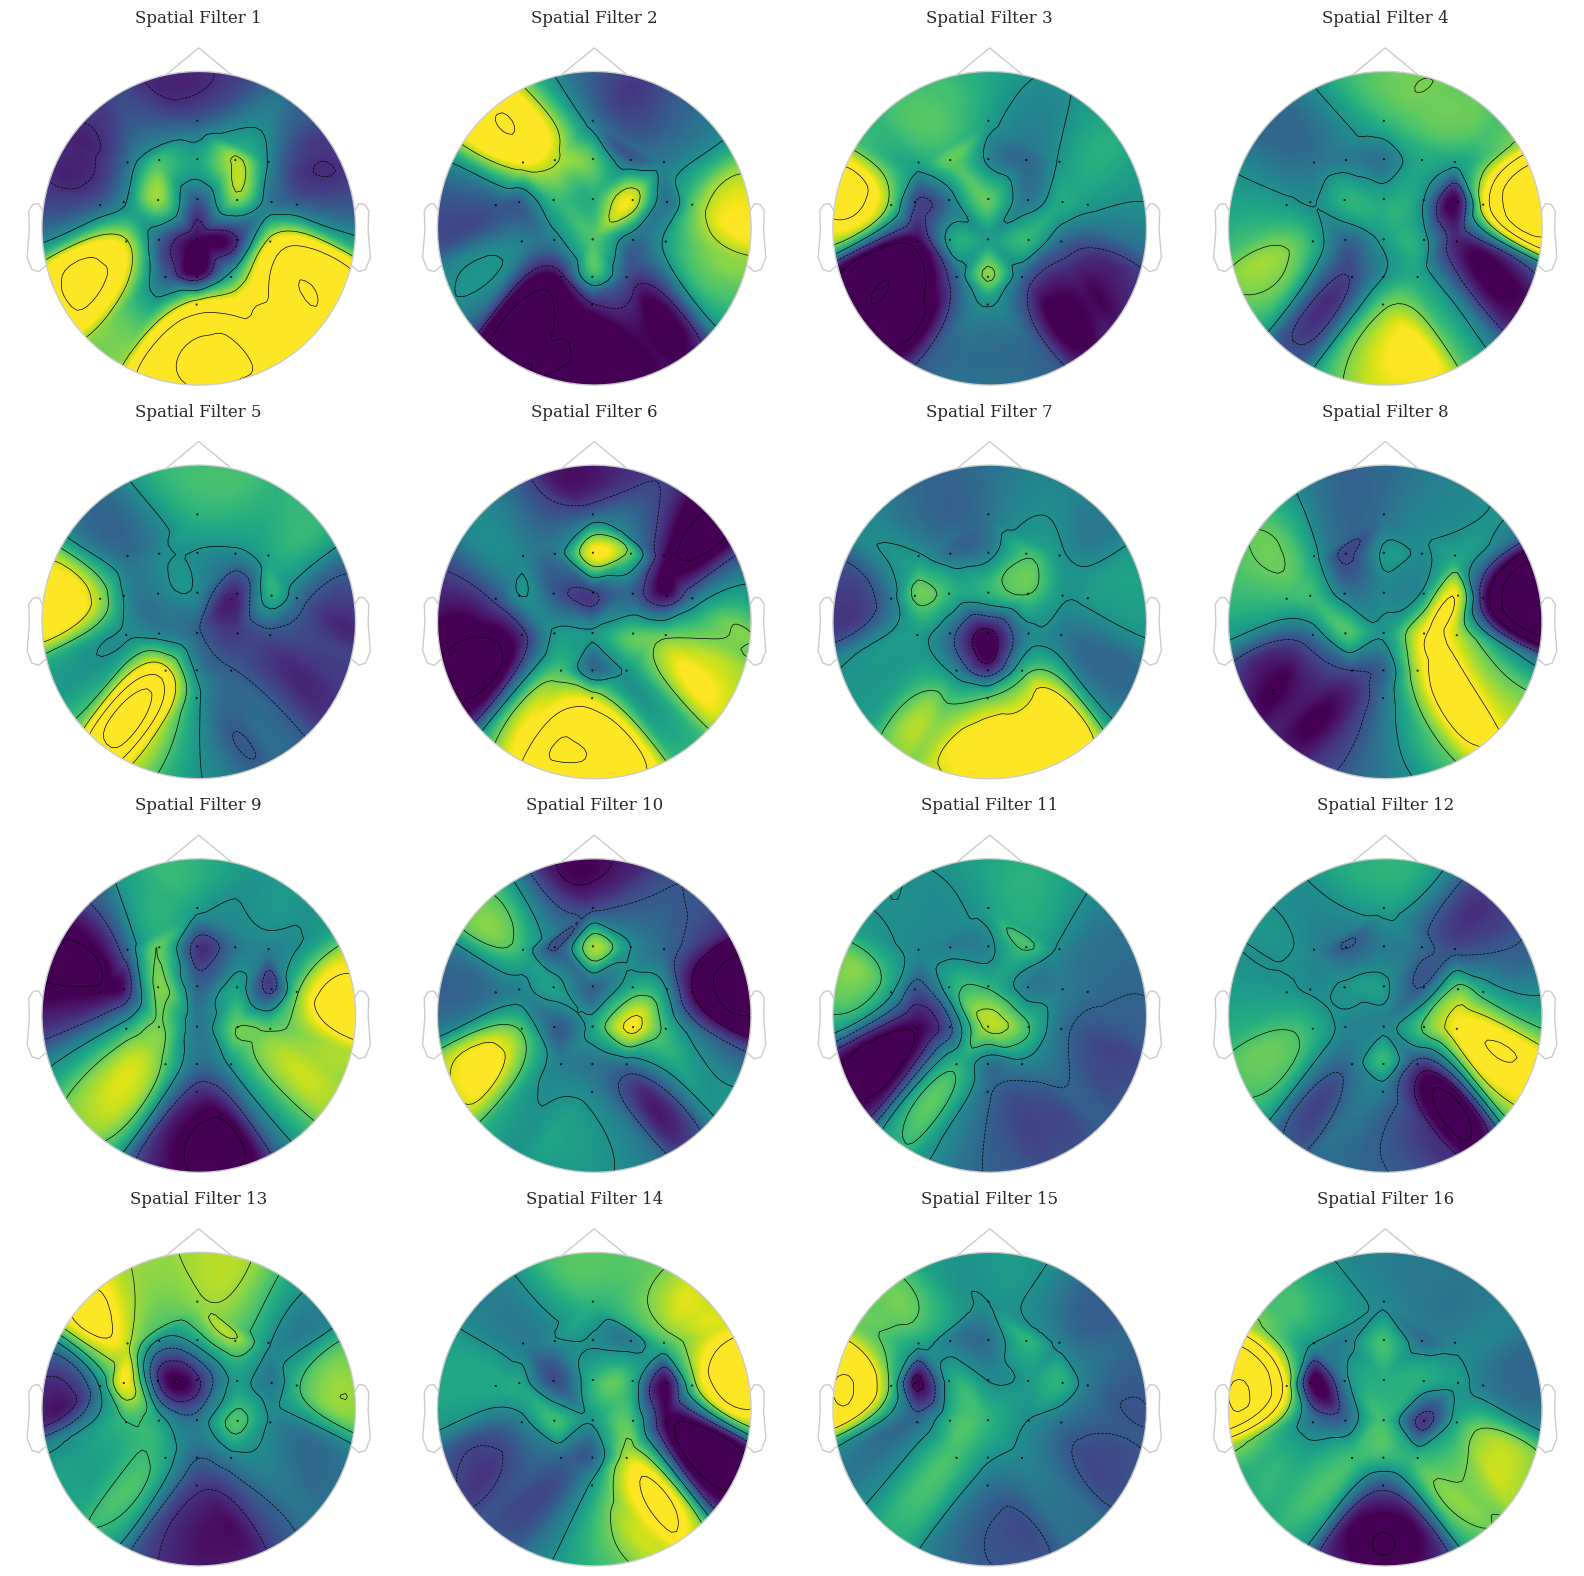

Validation Accuracy: 85.71%


In [31]:
# Visualize learned spatial filters using montages
from mne.viz import plot_topomap
import mne
info = mne.create_info(
    ch_names=[
            'Fz',  'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5',  'C3',  'C1',  'Cz', 
            'C2',  'C4',  'C6',  'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'P1',  'Pz', 
            'P2',  'POz'
        ],
    sfreq=128,
    ch_types='eeg'
)
montage = mne.channels.make_standard_montage('standard_1020')
info.set_montage(montage)
spatial_filters = best_model['spatial.weight']  # shape = (F1*D, F1, C, 1)
num_filters = spatial_filters.shape[0]
# Plot in a grid
n_cols = 4
n_rows = int(np.ceil(num_filters / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))
for i in range(num_filters):
    ax = axes[i // n_cols, i % n_cols]
    filter_weights = spatial_filters[i, 0, :, 0].numpy()  # shape = (C,)
    plot_topomap(filter_weights, info, axes=ax, show=False, cmap='viridis')
    ax.set_title(f'Spatial Filter {i+1}')
plt.tight_layout()
plt.show()

# Evaluate model accuracy on validation set
def evaluate_model(model, val_loader):
    correct = 0
    total = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for signals, labels in val_loader:
            # Map the old values (7, 8, 9, 10) to new values (0, 1, 2, 3)
            new_labels = torch.zeros_like(labels)
            new_labels[labels == 7] = 0
            new_labels[labels == 8] = 1
            new_labels[labels == 9] = 2
            new_labels[labels == 10] = 3

            signals = signals.float()  # ensure correct dtype
            outputs = model(signals)
            _, predicted = torch.max(outputs.data, 1)
            total += new_labels.size(0)
            correct += (predicted == new_labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy
accuracy = evaluate_model(model, val_loader)
print(f'Validation Accuracy: {accuracy:.2f}%')

# Permutation Test for Statistical Significance

A permutation test helps us determine if our model's performance is statistically significant by comparing it against a null distribution created by randomly permuting the labels.

In [32]:
def permutation_test(model_class, optimizer_func, loss_fn, train_loader, val_loader, 
                     original_accuracy, n_permutations=100, nepochs=200, C=22, T=257):
    """
    Perform permutation test by training models with shuffled labels.
    
    Args:
        model_class: The model class to instantiate (e.g., reEEGNet)
        optimizer_func: Function to create optimizer given model parameters
        loss_fn: Loss function
        train_loader: Training data loader
        val_loader: Validation data loader
        original_accuracy: The accuracy of the model with correct labels
        n_permutations: Number of permutation iterations
        nepochs: Number of epochs to train each permuted model
        C: Number of channels
        T: Number of time points
        
    Returns:
        permuted_accuracies: List of accuracies from permuted label models
        p_value: Statistical significance p-value
    """
    import random
    
    permuted_accuracies = []
    
    print(f"Running permutation test with {n_permutations} iterations...")
    print(f"Original model accuracy: {original_accuracy:.2f}%")
    
    for i in range(n_permutations):
        # Create a copy of the dataset with permuted labels
        # We'll create new data loaders with shuffled labels
        train_dataset_permuted = []
        for signals, labels in train_loader.dataset:
            train_dataset_permuted.append((signals, labels))
        
        # Shuffle the labels
        labels_only = [item[1] for item in train_dataset_permuted]
        random.shuffle(labels_only)
        
        # Create new dataset with shuffled labels
        train_dataset_shuffled = [(signals, new_label) for (signals, _), new_label in 
                                 zip(train_dataset_permuted, labels_only)]
        
        # Create new data loader
        train_loader_shuffled = data.DataLoader(train_dataset_shuffled, batch_size=64, shuffle=True)
        
        # Initialize new model with same architecture
        permuted_model = model_class(C=C, T=T)
        permuted_optimizer = optimizer_func(permuted_model.parameters())
        
        # Train the model with shuffled labels
        _, _, _ = train(permuted_model, permuted_optimizer, loss_fn, 
                      train_loader_shuffled, val_loader, nepochs=nepochs)
        
        # Evaluate the permuted model
        permuted_acc = evaluate_model(permuted_model, val_loader)
        permuted_accuracies.append(permuted_acc)
        
        if (i + 1) % 10 == 0:
            print(f"Completed {i + 1}/{n_permutations} permutations. "
                  f"Latest permuted accuracy: {permuted_acc:.2f}%")
    
    # Calculate p-value
    # P-value is the proportion of permuted accuracies >= original accuracy
    p_value = sum(1 for acc in permuted_accuracies if acc >= original_accuracy) / n_permutations
    
    return permuted_accuracies, p_value

In [ ]:
# Run the permutation test
# Note: This will take some time as it trains multiple models

# First, let's get our original model's accuracy
original_accuracy = evaluate_model(model, val_loader)
print(f"Original model accuracy: {original_accuracy:.2f}%")

# Define optimizer function
def create_optimizer(params):
    return torch.optim.Adam(params, eps=1e-07)

# Run permutation test with fewer permutations and epochs for demonstration
# For publication-quality results, use n_permutations=1000 and nepochs=500
permuted_accuracies, p_value = permutation_test(
    model_class=reEEGNet,
    optimizer_func=create_optimizer,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    original_accuracy=original_accuracy,
    n_permutations=50,  # Reduce for faster execution
    nepochs=100,        # Reduce for faster execution
    C=dataset.X.shape[1],
    T=dataset.X.shape[2]
)

print(f"\nPermutation Test Results:")
print(f"Original accuracy: {original_accuracy:.2f}%")
print(f"Mean permuted accuracy: {np.mean(permuted_accuracies):.2f}%")
print(f"Std permuted accuracy: {np.std(permuted_accuracies):.2f}%")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✓ Model performance is statistically significant (p < 0.05)")
else:
    print("✗ Model performance is NOT statistically significant (p >= 0.05)")

Original model accuracy: 85.71%
Running permutation test with 50 iterations...
Original model accuracy: 85.71%
Epoch: 1/100..  Training Loss: 1.420..  Validation Loss: 1.485.. 
Epoch: 51/100..  Training Loss: 1.343..  Validation Loss: 1.440.. 
Epoch: 1/100..  Training Loss: 1.408..  Validation Loss: 1.387.. 
Epoch: 51/100..  Training Loss: 1.355..  Validation Loss: 1.335.. 
Epoch: 1/100..  Training Loss: 1.415..  Validation Loss: 1.397.. 
Epoch: 51/100..  Training Loss: 1.299..  Validation Loss: 1.358.. 
Epoch: 1/100..  Training Loss: 1.443..  Validation Loss: 1.451.. 
Epoch: 51/100..  Training Loss: 1.332..  Validation Loss: 1.390.. 
Epoch: 1/100..  Training Loss: 1.402..  Validation Loss: 1.358.. 
Epoch: 51/100..  Training Loss: 1.359..  Validation Loss: 1.349.. 
Epoch: 1/100..  Training Loss: 1.403..  Validation Loss: 1.386.. 
Epoch: 51/100..  Training Loss: 1.333..  Validation Loss: 1.442.. 
Epoch: 1/100..  Training Loss: 1.384..  Validation Loss: 1.416.. 
Epoch: 51/100..  Training

In [ ]:
# Visualize the permutation test results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram of permuted accuracies
ax1.hist(permuted_accuracies, bins=20, alpha=0.7, color='lightblue', edgecolor='black')
ax1.axvline(original_accuracy, color='red', linestyle='--', linewidth=2, 
           label=f'Original Accuracy: {original_accuracy:.2f}%')
ax1.axvline(np.mean(permuted_accuracies), color='blue', linestyle='--', linewidth=2,
           label=f'Mean Permuted: {np.mean(permuted_accuracies):.2f}%')
ax1.set_xlabel('Accuracy (%)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Permuted Model Accuracies')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot comparison
ax2.boxplot([permuted_accuracies], labels=['Permuted Models'])
ax2.scatter([1], [original_accuracy], color='red', s=100, zorder=5, 
           label=f'Original Model: {original_accuracy:.2f}%')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Original vs Permuted Model Performance')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional statistics
print(f"\nDetailed Statistics:")
print(f"Original accuracy: {original_accuracy:.2f}%")
print(f"Chance level (25% for 4-class): 25.00%")
print(f"Permuted accuracies - Min: {np.min(permuted_accuracies):.2f}%")
print(f"Permuted accuracies - Max: {np.max(permuted_accuracies):.2f}%")
print(f"Permuted accuracies - Mean: {np.mean(permuted_accuracies):.2f}%")
print(f"Permuted accuracies - Median: {np.median(permuted_accuracies):.2f}%")
print(f"Effect size (Cohen's d): {(original_accuracy - np.mean(permuted_accuracies)) / np.std(permuted_accuracies):.2f}")
print(f"Number of permuted models with accuracy >= original: {sum(1 for acc in permuted_accuracies if acc >= original_accuracy)}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.001:
    significance = "highly significant (p < 0.001)"
elif p_value < 0.01:
    significance = "very significant (p < 0.01)"
elif p_value < 0.05:
    significance = "significant (p < 0.05)"
else:
    significance = "not significant (p >= 0.05)"

print(f"\nInterpretation: The model's performance is {significance}")

## Alternative: Quick Permutation Test on Pre-trained Model

If you want to run a faster version that doesn't retrain models but instead evaluates the pre-trained model on permuted validation data:

In [ ]:
def quick_permutation_test(model, val_loader, n_permutations=1000):
    """
    Quick permutation test using pre-trained model on shuffled validation labels.
    This is much faster but less rigorous than retraining models.
    """
    import random
    
    # Get original accuracy
    original_accuracy = evaluate_model(model, val_loader)
    
    # Collect all validation data
    all_signals = []
    all_labels = []
    
    for signals, labels in val_loader:
        all_signals.append(signals)
        all_labels.append(labels)
    
    all_signals = torch.cat(all_signals, dim=0)
    all_labels = torch.cat(all_labels, dim=0)
    
    permuted_accuracies = []
    
    print(f"Running quick permutation test with {n_permutations} iterations...")
    
    for i in range(n_permutations):
        # Shuffle labels
        indices = list(range(len(all_labels)))
        random.shuffle(indices)
        shuffled_labels = all_labels[indices]
        
        # Calculate accuracy with shuffled labels
        model.eval()
        with torch.no_grad():
            # Map the old values (7, 8, 9, 10) to new values (0, 1, 2, 3)
            new_labels = torch.zeros_like(shuffled_labels)
            new_labels[shuffled_labels == 7] = 0
            new_labels[shuffled_labels == 8] = 1
            new_labels[shuffled_labels == 9] = 2
            new_labels[shuffled_labels == 10] = 3
            
            signals = all_signals.float()
            outputs = model(signals)
            _, predicted = torch.max(outputs.data, 1)
            
            correct = (predicted == new_labels).sum().item()
            accuracy = 100 * correct / len(new_labels)
            permuted_accuracies.append(accuracy)
    
    # Calculate p-value
    p_value = sum(1 for acc in permuted_accuracies if acc >= original_accuracy) / n_permutations
    
    print(f"\nQuick Permutation Test Results:")
    print(f"Original accuracy: {original_accuracy:.2f}%")
    print(f"Mean permuted accuracy: {np.mean(permuted_accuracies):.2f}%")
    print(f"P-value: {p_value:.4f}")
    
    return permuted_accuracies, p_value, original_accuracy

# Run quick permutation test
quick_permuted_accs, quick_p_value, orig_acc = quick_permutation_test(model, val_loader, n_permutations=1000)

# Visualize quick results
plt.figure(figsize=(10, 6))
plt.hist(quick_permuted_accs, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(orig_acc, color='red', linestyle='--', linewidth=2, 
           label=f'Original Accuracy: {orig_acc:.2f}%')
plt.axvline(np.mean(quick_permuted_accs), color='blue', linestyle='--', linewidth=2,
           label=f'Mean Permuted: {np.mean(quick_permuted_accs):.2f}%')
plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')
plt.title('Quick Permutation Test: Distribution of Accuracies with Shuffled Labels')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Quick permutation test p-value: {quick_p_value:.4f}")
if quick_p_value < 0.05:
    print("Model performance is statistically significant (p < 0.05)")
else:
    print("Model performance is NOT statistically significant (p >= 0.05)")